In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn')

df = pd.read_csv('ab_testing.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286690 entries, 0 to 286689
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       286690 non-null  int64 
 1   timestamp     286690 non-null  object
 2   group         286690 non-null  object
 3   landing_page  286690 non-null  object
 4   converted     286690 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 10.9+ MB


In [3]:
pd.crosstab(df.group, df.landing_page)

landing_page,new_page,old_page
group,,
control,0,143293
treatment,143397,0


In [7]:
# calculate the effect size based on the baseline and expected conversion rates
effect_size = sm.proportion_effectsize(0.12, 0.14)
effect_size

-0.05951079608252374

In [8]:
# estimate the sample size using power analysis
sample_size = sm.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )

# make sample size an integer
sample_size = int(sample_size)
sample_size

4432

In [9]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [11]:
df.groupby('group').count()

,user_id,timestamp,landing_page,converted
group,,,,
control,143293,143293,143293,143293
treatment,143397,143397,143397,143397


In [12]:
control = df[df.group == 'control']
control

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
286683,718310,2017-01-21 22:44:20.378320,control,old_page,0
286685,751197,2017-01-03 22:28:38.630509,control,old_page,0
286686,945152,2017-01-12 00:51:57.078372,control,old_page,0
286687,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [13]:
len(control)

143293

In [14]:
sample_size

4432

In [57]:
# make a random sample
control_sample = control.sample(sample_size, random_state=42)

In [58]:
len(control_sample)

4432

In [59]:
treatment = df[df.group == 'treatment']
treatment

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
286674,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
286677,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
286680,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
286684,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [60]:
treatment_sample = treatment.sample(sample_size, random_state=42)
len(treatment_sample)

4432

In [61]:
ab_result = pd.concat([control_sample, treatment_sample])

In [62]:
len(ab_result)

8864

In [63]:
ab_result

,0,user_id,timestamp,group,landing_page,converted
2547,0.0,NaN,NaN,NaN,NaN,NaN
842,0.0,NaN,NaN,NaN,NaN,NaN
4082,0.0,NaN,NaN,NaN,NaN,NaN
964,0.0,NaN,NaN,NaN,NaN,NaN
318,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
224273,NaN,684863.0,2017-01-20 22:57:12.589363,treatment,new_page,0.0
106408,NaN,651827.0,2017-01-09 18:15:23.956908,treatment,new_page,0.0
136167,NaN,766249.0,2017-01-17 09:02:39.358863,treatment,new_page,0.0
241614,NaN,913902.0,2017-01-04 05:14:56.214319,treatment,new_page,0.0


In [64]:
ab_result.reset_index(drop=True, inplace=True)

In [65]:
ab_result

,0,user_id,timestamp,group,landing_page,converted
0,0.0,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
8859,NaN,684863.0,2017-01-20 22:57:12.589363,treatment,new_page,0.0
8860,NaN,651827.0,2017-01-09 18:15:23.956908,treatment,new_page,0.0
8861,NaN,766249.0,2017-01-17 09:02:39.358863,treatment,new_page,0.0
8862,NaN,913902.0,2017-01-04 05:14:56.214319,treatment,new_page,0.0


In [56]:
ab_result.group.value_counts()

treatment    4432
Name: group, dtype: int64

In [36]:
conversion_rate = ab_result.groupby('group').mean()['converted']

<AxesSubplot:xlabel='group'>

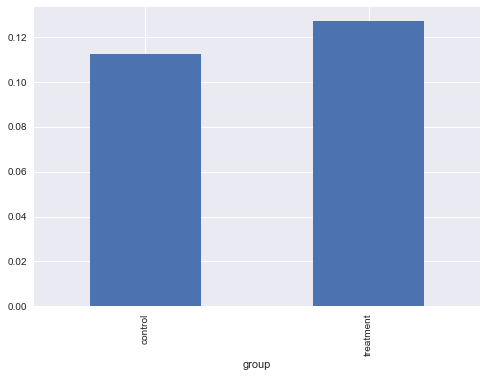

In [37]:
conversion_rate.plot.bar()

In [39]:
# statistical hypothesis test
from statsmodels.stats.proportion import proportions_ztest

# get the control group and treatment group
control = ab_result[ab_result.group == 'control']['converted']
treatment = ab_result[ab_result.group == 'treatment']['converted']

In [41]:
ab_result[ab_result.group == 'control']['converted']

0       0
1       1
2       0
3       0
4       0
       ..
4427    0
4428    0
4429    0
4430    0
4431    0
Name: converted, Length: 4432, dtype: int64

In [43]:
control.sum(), control.count()

(499, 4432)

In [44]:
treatment.sum(), treatment.count()

(563, 4432)

In [45]:
alpha = 0.05  # significant level

n_control = control.count()  # number of users in control
n_treatment = treatment.count()  # number of users in treatment

converted_control = control.sum()  # converted users in control
converted_treatment = treatment.sum()  # converted users in treatment

converted = [converted_control, converted_treatment]  # converted users in each group
total_obs = [n_control, n_treatment]  # total users in each group

In [46]:
# z-test
z, p = proportions_ztest(converted, nobs=total_obs)

# print the p value
print(f'p-value: {p:.3f}')

if p <= alpha:
    print('The result is significant: there is a difference in the conversion rate, reject H0')
else:
    print('The result is not significant: there is no difference in the conversion rate, fail to reject H0')

p-value: 0.036
The result is significant: there is a difference in the conversion rate, reject H0
